# Logistic regression

\begin{align}
    \frac{\partial Cost(\hat{y}, y)}{\partial \textbf{w}} &= \frac{1}{m} \textbf{X}^T (\hat{y} - y) \\
    &= \frac{1}{m} \textbf{X}^T (\sigma (\textbf{X w + b}) - y)
    
\end{align}

we use gradient descent to get the values

\begin{align}
    p(y|x) = \hat{y} (1 - y)^{1 - y}
\end{align}

this is the loss for one sample $\textbf{x}$ and $\textbf{y}$. We want to maximize the probability of the correct class. So we want to maximize the probability of the correct class for all samples. So we want to maximize the product of the probabilities of the correct class for all samples. So we want to maximize the log of the product of the probabilities of the correct class for all samples. So we want to minimize the negative log of the product of the probabilities of the correct class for all samples. This is the cross entropy loss.

## example

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [2]:


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


True positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

True negatives (TN): We predicted no, and they don't have the disease.

False positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

False negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


|        | Positive | Negative |
|------ | -------- | -------- |
|Pred Pos|    TP    |    FP    |
|Pred Neg|    FN    |    TN    |


In [3]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[75 14]
 [20 91]]


Precision, Recall, and F1-Score:
These are more insightful metrics, especially for imbalanced datasets.

- Precision: What fraction of predicted positives are actually positive?
- Recall: What fraction of actual positives were correctly predicted?
- F1-Score: The harmonic mean of precision and recall.

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.87
Recall: 0.82
F1-Score: 0.84


**ROC Curve and AUC (Area Under the Curve):**

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at different threshold levels. The AUC score gives a sense of how well the model distinguishes between classes (the higher the AUC, the better).

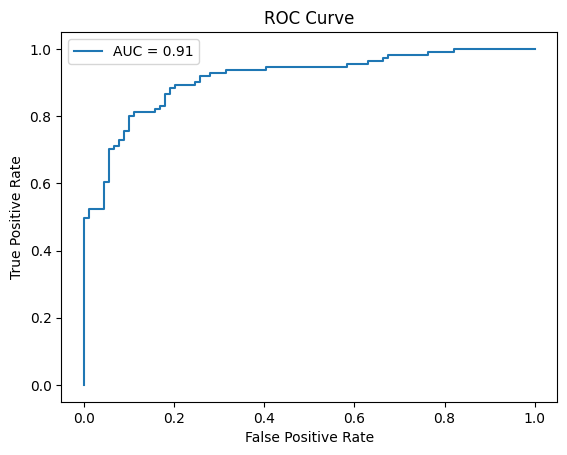

In [5]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)    

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

**Statistical Significance of Coefficients:**

Logistic regression provides the coefficients (weights) for each feature. We can check if these coefficients are statistically significant using a Wald test, which tests if each coefficient is significantly different from zero. While Scikit-learn doesn't provide this directly, libraries like statsmodels do.

Here's how you can do it using statsmodels:

In [6]:
import statsmodels.api as sm

# Add an intercept column
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary to check the p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.320002
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      791
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:                  0.5380
Time:                        13:40:37   Log-Likelihood:                -256.00
converged:                       True   LL-Null:                       -554.16
Covariance Type:            nonrobust   LLR p-value:                1.453e-123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1401      0.116      1.208      0.227      -0.087       0.367
x1            -0.4581        

P>|z| (P-value for Z-statistic)
The P>|z| is the p-value associated with the Z-statistic (also known as the Wald test). Here's what it means step-by-step:

Z-statistic (Z): The Z-statistic tests the null hypothesis that the coefficient of a given feature is zero (meaning the feature has no effect on the outcome).

Formula: 

\begin{align}

Z = \frac{Coefficient}{Standard Error}

\end{align}

So, for each feature in your model, this Z-statistic tells us how many standard deviations away from zero the coefficient is.

**P-value (P>|z|)**: This p-value tells you the probability that the coefficient is not significantly different from zero.

If the P>|z| is very small (usually below a threshold like 0.05), it suggests that the feature has a statistically significant effect on the outcome.

If the P>|z| is large (above 0.05), the feature is likely not significant, meaning it probably doesn't affect the model much.

Interpretation of P>|z|:

**Low P-value (< 0.05)**: This means you can reject the null hypothesis that the coefficient is zero, meaning the feature has a significant effect on the outcome. You can consider the feature as important.

**High P-value (> 0.05)**: This means you fail to reject the null hypothesis. The coefficient might be zero, and thus the feature may not have a significant impact on the model.


IMPORTANT: if a value is nan, there is a high probability to be correlated to other values

## Checking Multicollinearity (Correlation Between Features)

Multicollinearity occurs when features are highly correlated with each other, which can lead to redundant information and instability in model coefficients.

a. **Correlation Matrix**:

A correlation matrix helps you visualize how each feature correlates with others. If two features have high correlation (close to 1 or -1), you might want to remove one of them.

\begin{equation}
    r = \frac{
        \sum (X - \bar{X})(Y - \bar{Y})
    }{
        \sqrt{\sum (X - \bar{X})^2 \sum (Y - \bar{Y})^2}
    }
\end{equation}

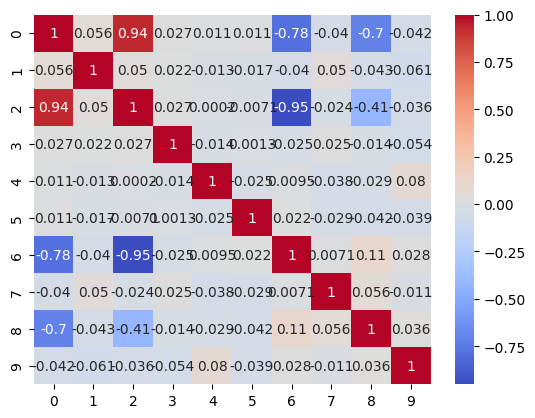

In [7]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = np.corrcoef(X_train.T)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


b. **Variance Inflation Factor (VIF):**

VIF quantifies how much a feature is correlated with other features. If VIF > 5 (or 10, depending on the context), the feature might be too correlated with others, and you might consider removing it.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Add a constant to the X_train
X_train_vif = sm.add_constant(X_train)
X_train_vif_scale = scaler.fit_transform(X_train_vif)

# Calculate VIF for each feature
vif_list = list()
for i in range(X_train_vif.shape[1]):
    try:
        vif = variance_inflation_factor(X_train_vif_scale, i)
        vif = float(vif)
        print(f"VIF for feature {i}: {vif}")
        vif_list.append(vif)
    except ZeroDivisionError as error:
        print(f"VIF for feature {i}: Divided by zero")
        vif_list.append(0)
    
print(vif_list)

VIF for feature 0: nan
VIF for feature 1: inf
VIF for feature 2: 1.0100408271359358
VIF for feature 3: inf
VIF for feature 4: 1.0045380969388669
VIF for feature 5: 1.009643071429152
VIF for feature 6: 1.0056816602113847
VIF for feature 7: inf
VIF for feature 8: 1.0085832062708493
VIF for feature 9: inf
VIF for feature 10: 1.0159882671441731
[nan, inf, 1.0100408271359358, inf, 1.0045380969388669, 1.009643071429152, 1.0056816602113847, inf, 1.0085832062708493, inf, 1.0159882671441731]


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


If a feature has a high VIF, you should consider removing it or using dimensionality reduction techniques like PCA (Principal Component Analysis).

In [24]:
X_clean =  np.delete(X_train_vif_scale, [3, 9], axis=1)


# Fit logistic regression on the reduced dataset
model = LogisticRegression()
model.fit(X_clean, y_train)

y_pred = model.predict(X_clean)

# Calculate the accuracy
accuracy = accuracy_score(y_pred, y_train)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


## Feature Selection and Feature Engineering
To improve your model, you can apply techniques for feature extraction and selection:

a. **Recursive Feature Elimination (RFE)**:
This is a method to automatically select the most important features. It recursively removes less important features and refits the model until only the desired number of features is left.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Use RFE to select the top 5 features
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_
print(f"Selected Features: {selected_features}")


Selected Features: [ True False  True False False  True  True False  True False]


b. **Lasso (L1) Regularization:**

Lasso regularization (L1) adds a penalty to the logistic regression that forces the coefficients of less important features to be zero, effectively performing feature selection.

In [10]:
# Lasso (L1) Regularization in Logistic Regression
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
print(f"Feature Coefficients: {coefficients}")


Feature Coefficients: [[ 0.          0.15064283  0.          0.04401992 -0.03209153 -0.21841647
   2.22080953  0.         -0.29605326  0.08707553]]


## Dimensionality Reduction
If your dataset has many features, you may want to reduce its dimensionality to improve performance:

a. **Principal Component Analysis (PCA):**

PCA is an unsupervised method used to reduce the dimensionality of your dataset while retaining as much variance as possible.

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the number of features
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit logistic regression on the reduced dataset
model = LogisticRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84
